# Assignment 7

https://ocw.mit.edu/courses/mathematics/18-05-introduction-to-probability-and-statistics-spring-2014/assignments/MIT18_05S14_ps6.pdf

## Problem 1

a)
binomial:
$f(k) = \binom{n}{k} p^k (1-p)^{n-k}$

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import binom

In [2]:
times = 250
heads = 140
tails = 110
theta = 0.5
p_value = 0.07

In [3]:
k = np.arange(0, times+1)
pmf = binom.pmf(k, times, theta)
cdf = binom.cdf(k, times, theta)

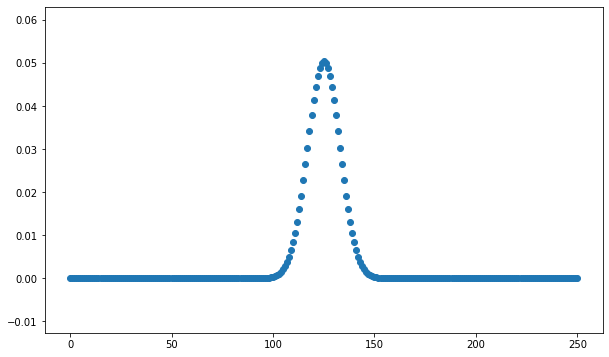

In [4]:
fig, ax = plt.subplots(1, 1, figsize = (10,6))
ax.scatter(k, pmf)

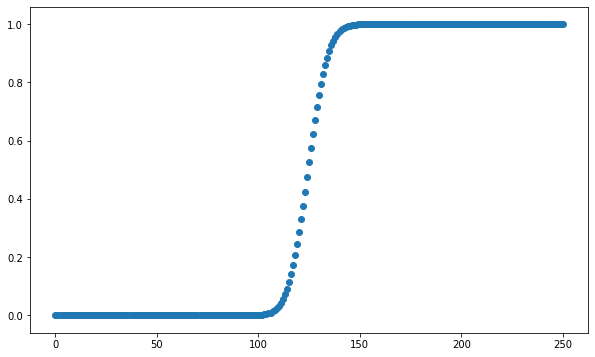

In [5]:
fig, ax = plt.subplots(1, 1, figsize = (10,6))
ax.scatter(k, cdf)

In [6]:
cdf_140 = binom.cdf(heads-1, times, theta)
cdf_140

0.9667894243799757

In [7]:
p_value_one_sided = 1 - cdf_140
p_value_one_sided

0.033210575620024274

In [8]:
p_value_two_sided = 2*p_value_one_sided
print(p_value_two_sided)
print("two sided p_value is approximately 7%")

0.06642115124004855
two sided p_value is approximately 7%


b)

In [9]:
# significance level alpha
alpha = 0.1
if p_value_two_sided < alpha:
    print(f"For alpha = {alpha}: Hypothesis H0 should be rejected!")
else:
    print(f"For alpha = {alpha}: Provided data are not sufficient to reject H0")

For alpha = 0.1: Hypothesis H0 should be rejected!


In [10]:
alpha = 0.05
if p_value_two_sided < alpha:
    print(f"For alpha = {alpha}: Hypothesis H0 should be rejected!")
else:
    print(f"For alpha = {alpha}: Provided data are not sufficient to reject H0")

For alpha = 0.05: Provided data are not sufficient to reject H0


c)

In [11]:
alpha = 0.01
critical_value_left = binom.ppf(alpha/2, times, theta)-1
print(f"Critical value left = {critical_value_left}, corresponding cdf {binom.cdf(critical_value_left, times, theta)}")
critical_value_right = binom.ppf(1 - alpha/2, times, theta)+1
print(f"Critical value right = {critical_value_right}, corresponding cdf {1-binom.cdf(critical_value_right, times, theta)}")

Critical value left = 104.0, corresponding cdf 0.004687585164863969
Critical value right = 146.0, corresponding cdf 0.003211012304069838


d)

In [12]:
alpha = 0.05
theta_h_a1 = 0.55
theta_h_a2 = 0.6

In [13]:
critical_value_left = binom.ppf(alpha/2, times, theta)-1
print(f"Critical value left = {critical_value_left}, corresponding cdf {binom.cdf(critical_value_left, times, theta)}")
critical_value_right = binom.ppf(1 - alpha/2, times, theta)+1
print(f"Critical value right = {critical_value_right}, corresponding cdf {1-binom.cdf(critical_value_right, times, theta)}")

Critical value left = 109.0, corresponding cdf 0.02485339389510076
Critical value right = 141.0, corresponding cdf 0.018333606733820007


In [14]:
power_h_a1 = binom.cdf(critical_value_left, times, theta_h_a1) + 1 - binom.cdf(critical_value_right-1, times, theta_h_a1)
power_h_a1

0.35236671972589906

In [15]:
power_h_a2 = binom.cdf(critical_value_left, times, theta_h_a2) + 1 - binom.cdf(critical_value_right-1, times, theta_h_a2)
power_h_a2

0.8896251002901934

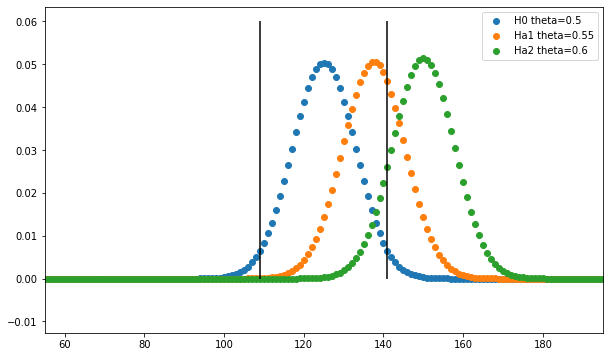

In [16]:
k = np.arange(0, times+1)
pmf_h0 = binom.pmf(k, times, theta)
pmf_h_a1 = binom.pmf(k, times, theta_h_a1)
pmf_h_a2 = binom.pmf(k, times, theta_h_a2)

fig, ax = plt.subplots(1, 1, figsize = (10,6))
ax.scatter(k, pmf_h0, label = f"H0 theta={theta}")
ax.scatter(k, pmf_h_a1, label = f"Ha1 theta={theta_h_a1}")
ax.scatter(k, pmf_h_a2, label = f"Ha2 theta={theta_h_a2}")
ax.vlines([critical_value_left, critical_value_right], ymin=0, ymax=0.06)
d = 70
ax.set_xlim(times/2 - d, times/2+d)
ax.legend();

e)

In [17]:
alpha = 0.05
times = 1055
theta_a = 0.55

critical_value_left = binom.ppf(alpha/2, times, theta)-1
print(f"Critical value left = {critical_value_left}, corresponding cdf {binom.cdf(critical_value_left, times, theta)}")
critical_value_right = binom.ppf(1 - alpha/2, times, theta)+1
print(f"Critical value right = {critical_value_right}, corresponding cdf {1-binom.cdf(critical_value_right, times, theta)}")
power_h_a = binom.cdf(critical_value_left, times, theta_a) + 1 - binom.cdf(critical_value_right-1, times, theta_a)
print(f"Power of test: {power_h_a}")

Critical value left = 495.0, corresponding cdf 0.024370740432048083
Critical value right = 560.0, corresponding cdf 0.021052811045858544
Power of test: 0.9003444391246991


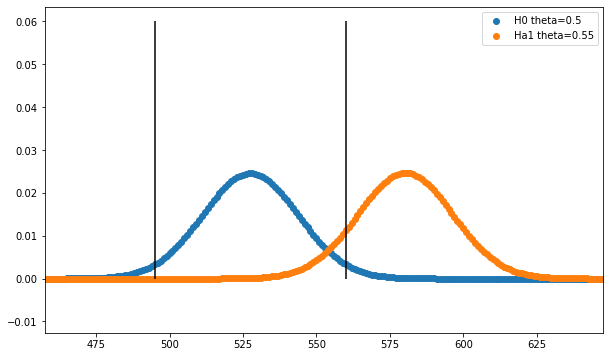

In [18]:
k = np.arange(0, times+1)
pmf_h0 = binom.pmf(k, times, theta)
pmf_h_a = binom.pmf(k, times, theta_a)

fig, ax = plt.subplots(1, 1, figsize = (10,6))
ax.scatter(k, pmf_h0, label = f"H0 theta={theta}")
ax.scatter(k, pmf_h_a, label = f"Ha1 theta={theta_a}")
ax.vlines([critical_value_left, critical_value_right], ymin=0, ymax=0.06)
d = 70
ax.set_xlim(times/2 - d, times/2+d+50)
ax.legend();

f)

| H |prior P(H)| likelihood P(D\|H) | Bayes num | Posterior |
|---|---|---|---|---|
| H0: theta = 0.50 | 0.5  | 0.5^140 \* (1-0.5)^110 = 0.5^250  | 0.5 \* 0.5^140 \* (1-0.5)^110 |  0.14757251646199435 |
| H1: theta = 0.55  | 0.5  | 0.55^140 \* (1-0.55)^110  | 0.5 \* 0.55^140 \* (1-0.55)^110 |0.8524274835380057  |

In [19]:
c = 0.5*0.5**250 + 0.5*0.55**140*0.45**110

In [20]:
0.5*0.5**250/c

0.14757251646199435

In [21]:
0.5*0.55**140*0.45**110/c

0.8524274835380057

## Problem 2

| _ |Testee is truthful| Testee is lying |
|---|---|---|
| Tester thinks testee is truthful| 131 | 15  | 
|Tester thinks tested is lying | 9 | 125  | 

a)

In [22]:
error_type_1 = 9/140
error_type_1

0.06428571428571428

In [23]:
error_type_2 = 15/140
error_type_2

0.10714285714285714

b)  
significance level = P(type I error)  
power = 1 - P(type II error)  

## Problem 3

In [24]:
h0_mean = 10
alpha = 0.05
n = 16
sample_mean = 11
sample_variance = 4

In [25]:
test_statistic = (sample_mean - h0_mean)/(sample_variance**0.5/n**0.5)
test_statistic

2.0

In [26]:
from scipy.stats import t

a)

In [27]:
p_value_two_sided = 2*(1 - t.cdf(test_statistic, n-1))
p_value_two_sided

0.06394500728472008

In [28]:
if p_value_two_sided < alpha:
    print(f"For alpha = {alpha}: Hypothesis H0 should be rejected!")
else:
    print(f"For alpha = {alpha}: Provided data are not sufficient to reject H0")

For alpha = 0.05: Provided data are not sufficient to reject H0


b)

In [29]:
p_value_one_sided = 1 - t.cdf(test_statistic, n-1)
p_value_one_sided

0.03197250364236004

In [30]:
if p_value_one_sided < alpha:
    print(f"For alpha = {alpha}: Hypothesis H0 should be rejected!")
else:
    print(f"For alpha = {alpha}: Provided data are not sufficient to reject H0")

For alpha = 0.05: Hypothesis H0 should be rejected!


## Problem 4

a)  
H0: Measurement is lower than 40  
HA: Measurement is higher than 40  
b)  


In [31]:
alpha = 0.04
std = 5
mu = 40
n = 3

In [32]:
from scipy.stats import norm

In [33]:
speed_threshold = 45.0
test_statistic = (speed_threshold - mu)/(std/n**0.5)
test_statistic

1.7320508075688772

In [34]:
one_side_p_value = 1-norm.cdf(test_statistic)
one_side_p_value

0.041632258331775196

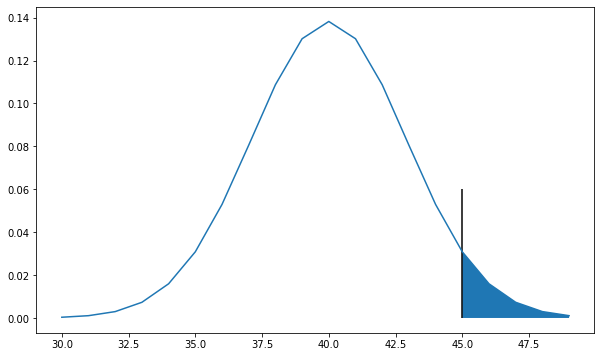

In [35]:
x = np.arange(30,50)
y = norm.pdf(x, loc=mu, scale=std/n**0.5)

fill_x = x[x>=speed_threshold]
fill_y_bot = np.zeros_like(fill_x)
fill_y_top = y[-len(fill_x):]

fig, ax = plt.subplots(1, 1, figsize = (10,6))
ax.plot(x, y)
ax.vlines([speed_threshold], ymin=0, ymax=0.06)
ax.fill_between(fill_x, fill_y_top)

c)


In [58]:
mu_0 = 40
mu_1 = 45
alpha = 0.04
required_power = 0.9
std = 5
n = 3

In [63]:
critical_value = norm.ppf(1-alpha, loc=mu_0, scale = std/n**0.5)
# actual power of test
power = 1-norm.cdf(critical_value, loc=mu_1, scale = std/n**0.5)
power

0.49256603568204216

In [64]:
n = 10
critical_value = norm.ppf(1-alpha, loc=mu_0, scale = std/n**0.5)
# check if power >= 0.9
power = 1-norm.cdf(critical_value, loc=mu_1, scale = std/n**0.5)
power

0.9209648747875261

## Problem 5

a)  
P(type I error):  
$P(reject H_0 | H_0) = (0.1 + 2.0 - 1.9)/2.0 = 0.1$


b)
P(type II error):   
$P(fail \ to \ reject \ H_0 | H_1) = (1.9 - 0.1)/2.5 = 0.72$